Test of NN 

In [1]:
# https://ipython.org/ipython-doc/3/config/extensions/autoreload.html
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [3]:
# Keras common configuration
#import os
#os.environ['KERAS_BACKEND'] = 'theano'
#os.environ['THEANO_FLAGS'] = 'mode=FAST_RUN,device=gpu,floatX=float32,optimizer=fast_compile'
#from keras.backend import set_image_dim_ordering
#set_image_dim_ordering('th')
#print("Keras user configuration is setup")

In [4]:
import theano
from keras.backend import image_dim_ordering
print theano.config.device
print image_dim_ordering()

WARNING (theano.sandbox.cuda): The cuda backend is deprecated and will be removed in the next release (v0.10).  Please switch to the gpuarray backend. You can get more information about how to switch at this URL:
 https://github.com/Theano/Theano/wiki/Converting-to-the-new-gpu-back-end%28gpuarray%29

Using gpu device 0: GeForce GT 750M (CNMeM is enabled with initial size: 50.0% of memory, cuDNN 5103)
Using Theano backend.


gpu0
th


In [5]:
from keras.layers import Convolution2D
from keras.models import Sequential, Model
from keras.optimizers import Adam

In [6]:
from keras.layers import Input, MaxPooling2D, UpSampling2D, Convolution2D, merge, Reshape, Activation, BatchNormalization
from keras import backend as K
from keras.engine.topology import Layer
from keras.regularizers import l2
from keras.constraints import nonneg, unitnorm, Constraint, maxnorm

## Inspect images in each layer  

In [29]:
n_filters_0 = 8
n_classes = 2
input_height = 16
input_width = 16
n_channels = 4
deep=False

inputs = Input((n_channels, input_height, input_width))
x = inputs

x1 = Convolution2D(n_filters_0, 3, 3, border_mode='same', activation='relu')(x)

x = MaxPooling2D()(x1)
x2 = Convolution2D(n_filters_0 * 2, 3, 3, border_mode='same', activation='relu')(x)
# size/2

# x = MaxPooling2D()(x2)
# x3 = Convolution2D(n_filters_0 * 4, 3, 3, border_mode='same', activation='relu')(x)
# # size/4

# x = UpSampling2D()(x3)
# x = merge([x2, x], mode='concat', concat_axis=1)
# x = Convolution2D(n_filters_0 * 2, 3, 3, border_mode='same', activation='relu')(x)
# # size/2

x = x2
x = UpSampling2D()(x)
x = merge([x1, x], mode='concat', concat_axis=1)
x = Convolution2D(n_filters_0, 3, 3, border_mode='same', activation='relu')(x)

x = Convolution2D(n_classes, 1, 1, border_mode='same', activation='sigmoid')(x)

outputs = x

model = Model(input=inputs, output=outputs)

In [30]:
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_3 (InputLayer)             (None, 4, 16, 16)     0                                            
____________________________________________________________________________________________________
convolution2d_9 (Convolution2D)  (None, 8, 16, 16)     296         input_3[0][0]                    
____________________________________________________________________________________________________
maxpooling2d_3 (MaxPooling2D)    (None, 8, 8, 8)       0           convolution2d_9[0][0]            
____________________________________________________________________________________________________
convolution2d_10 (Convolution2D) (None, 16, 8, 8)      1168        maxpooling2d_3[0][0]             
___________________________________________________________________________________________

In [31]:
model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['recall', 'precision', 'accuracy'])

In [32]:
inputs = np.random.rand(1,4,input_height, input_width) * 0.5 + 2.0

# Object detectable as ratio 1/2 
inputs[0,0,3:5,5:7] = 3.3*np.arange(1,5).reshape((2,2))
inputs[0,0,4:7,1:3] = 3.2*np.array([1,1.5,1,1,1.4,1.3]).reshape((3,2))

inputs[0,1,3:5,5:7] = 0.1 * np.arange(1,5).reshape((2,2))
inputs[0,1,4:7,1:3] = 0.4 * np.array([1,1.5,1,1,1.4,1.3]).reshape((3,2))



# Object detectable as ratio 3/1 
inputs[0,0,10:12,10:12] = 1.1*np.array([1,1.5,1,1]).reshape((2,2))
inputs[0,2,10:12,10:12] = 2.7*np.array([1,1.5,1,1]).reshape((2,2))
inputs[0,2,:,:] += 1.5

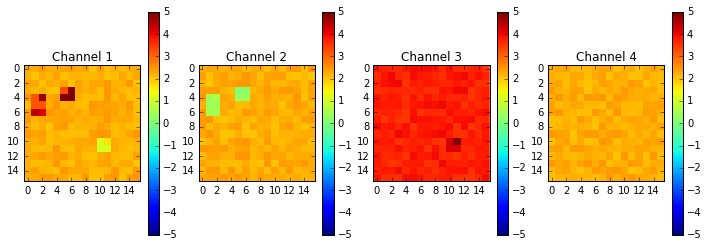

In [33]:
plt.figure(figsize=(12,4))
for i in range(inputs.shape[1]):
    plt.subplot(1,4,i+1)
    plt.imshow(inputs[0,i,:,:], interpolation='none', clim=[-5, 5])
    plt.colorbar()
    plt.title("Channel %s" % str(i+1))

In [34]:
y = np.zeros((1,2,input_height, input_width), dtype=np.uint8)
y[0,0,3:5,5:7] = 1
y[0,0,4:7,1:3] = 1
y[0,1,10:12,10:12] = 1

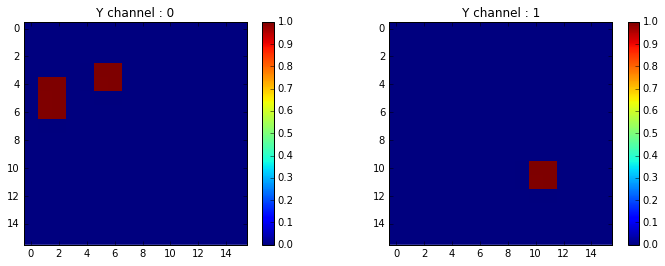

In [35]:
plt.figure(figsize=(12,4))
for i in range(y.shape[1]):
    plt.subplot(1,y.shape[1],i+1)
    plt.imshow(y[0,i,:,:], interpolation='none', clim=[0, 1])
    plt.colorbar()
    plt.title("Y channel : %s" % i)

In [114]:
batch_size=1
hist = model.fit(inputs, y, nb_epoch=10, batch_size=batch_size, verbose=2)

Epoch 1/10
0s - loss: 0.0038 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 2/10
0s - loss: 0.0037 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 3/10
0s - loss: 0.0033 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 4/10
0s - loss: 0.0033 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 5/10
0s - loss: 0.0034 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 6/10
0s - loss: 0.0031 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 7/10
0s - loss: 0.0029 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 8/10
0s - loss: 0.0028 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 9/10
0s - loss: 0.0028 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 10/10
0s - loss: 0.0027 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000


In [ ]:
y_pred = model.predict(inputs)
y_pred.shape, y_pred.min(), y_pred.max()

plt.figure(figsize=(12,4))
for i in range(y.shape[1]):
    plt.subplot(1,y.shape[1],i+1)
    plt.imshow(y[0,i,:,:], interpolation='none', clim=[0, 1])
    plt.colorbar()
    plt.title("Y channel : %s" % i)

plt.figure(figsize=(12,4))
for i in range(y_pred.shape[1]):
    plt.subplot(1,y_pred.shape[1],i+1)
    plt.imshow(y_pred[0,i,:,:], interpolation='none', clim=[0, 1])
    plt.colorbar()
    plt.title("Y_pred channel : %s" % i)

In [64]:
import keras.backend as K

def get_layer_output_f(layer_name, model):
    inputs = [K.learning_phase()] + model.inputs
    output_layer = model.get_layer(name=layer_name)
    outputs = output_layer.output
    return K.function(inputs, [outputs])
    
def compute_layer_output(input_data, layer_output_f):
    return layer_output_f([0] + [input_data])

layer_output_f = get_layer_output_func('convolution2d_9', model)

In [86]:
def compute_layer_outputs(model, layer_output_f_dict={}):
    layer_outputs = []
    for layer in model.layers:
        if layer in model.input_layers or layer in model.output_layers:
            continue
        print layer.name
        if layer.name not in layer_output_f_dict:
            layer_output_f_dict[layer.name] = get_layer_output_func(layer.name, model)
        layer_outputs.append((layer.name, compute_layer_output(inputs, layer_output_f_dict[layer.name])))
    return layer_outputs

In [89]:
def display_layer_output(layer_output):
    plt.figure(figsize=(12,4))
    plt.suptitle("%s" % layer_output[0])
    nc = layer_output[1].shape[1]
    n_cols = 4 
    n_rows = int(np.floor(nc / n_cols))
    for i in range(nc):
        plt.subplot(n_rows,n_cols,i+1)
        plt.imshow(layer_output[1][0,i,:,:], interpolation='none', clim=[0, 1])
        plt.colorbar()
        plt.title("%i" % i)

In [111]:
layer_output_f_dict = {}
layer_outputs = compute_layer_outputs(model, layer_output_f_dict)

convolution2d_9
maxpooling2d_3
convolution2d_10
upsampling2d_3
merge_3
convolution2d_11


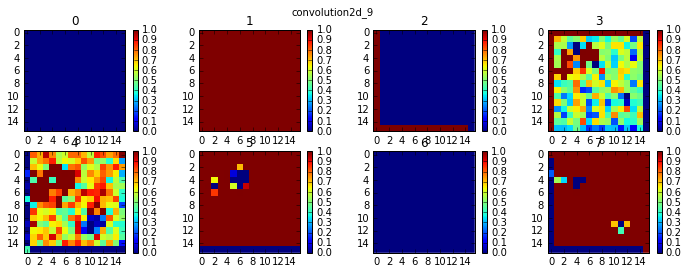

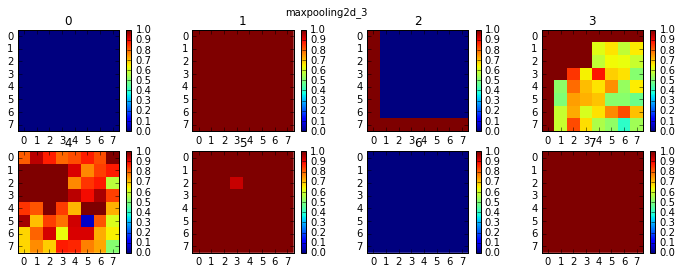

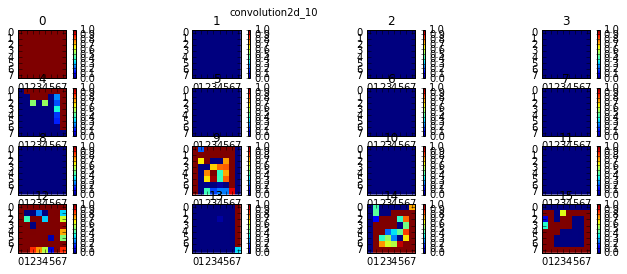

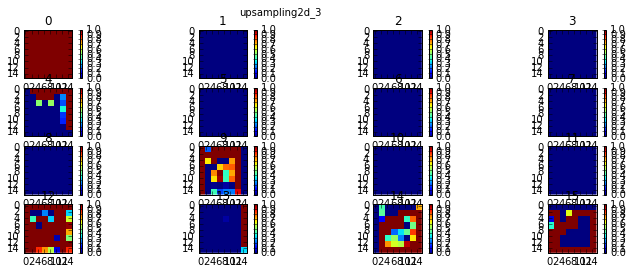

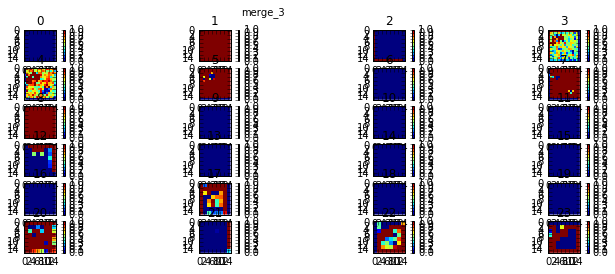

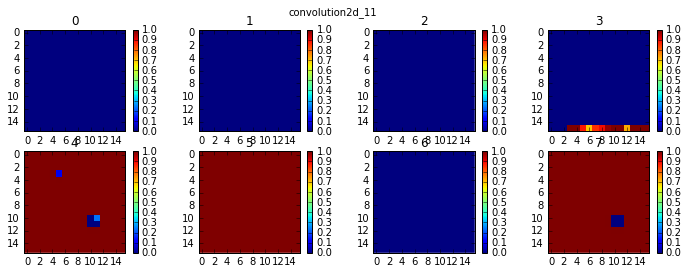

In [112]:
for layer_output in layer_outputs:
    display_layer_output(layer_output)

In [114]:
# # x = inputs.astype(np.float)
# # # for i in range(x.shape[1]):
# # #     mean = np.mean(x[0,i,:,:]) 
# # #     std = np.std(x[0,i,:,:])
# # #     x[0,i,:,:] -= mean
# # #     x[0,i,:,:] /= std
# # print x.min(), x.mean(), x.max()

# def generate_ratios(inputs):
#     # Generate channels ratios:
#     in_shape = inputs.shape
#     out_shape = list(inputs.shape)
#     out_shape[1] *= (out_shape[1] - 1)
#     outputs = np.zeros(out_shape)
#     for k in range(out_shape[0]):
#         for i in range(in_shape[1]):
#             vals = range(in_shape[1])
#             vals.remove(i)
#             for j, v in enumerate(vals):
#                 outputs[k,i*(in_shape[1]-1) + j,:,:] = inputs[k,i,:,:] / inputs[k,v,:,:]
#     return outputs

# # Generate ratios : 1/2, 1/3, 1/4, 2/1, 2/3, 2/4, 3/1, 3/2, 3/4, 4/1, 4/2, 4/3
# x = generate_ratios(inputs)
# x.shape

(1L, 12L, 15L, 15L)

In [115]:
# y = np.random.rand(batch_size, n_classes, input_height, input_width)
# print y.min(), y.max()

y = np.zeros((1,2,input_height, input_width), dtype=np.uint8)
y[0,0,3:5,5:7] = 1
y[0,0,4:7,1:3] = 1
y[0,1,10:12,10:12] = 1

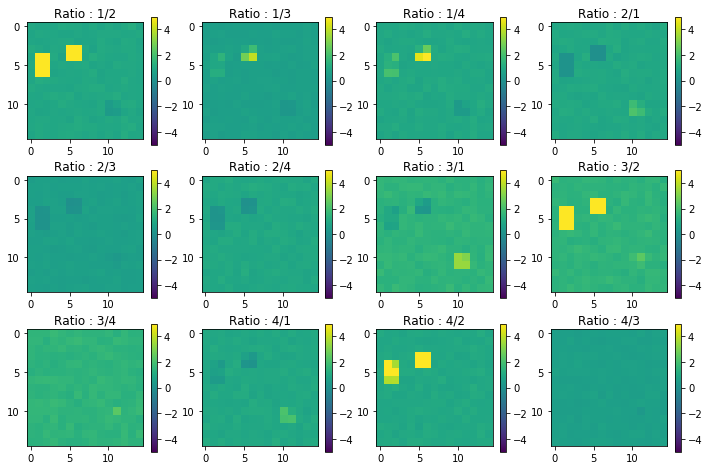

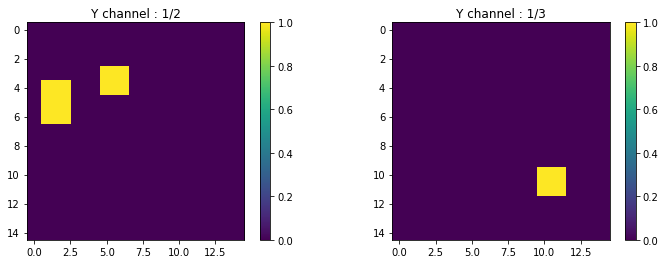

In [117]:
plt.figure(figsize=(12,8))
ratios = ["1/2", "1/3", "1/4", "2/1", "2/3", "2/4", "3/1", "3/2", "3/4", "4/1", "4/2", "4/3"]
for i in range(x.shape[1]):
    plt.subplot(3,4,i+1)
    plt.imshow(x[0,i,:,:], interpolation='none', clim=[-5, 5])
    plt.colorbar()
    plt.title("Ratio : %s" % ratios[i])

plt.figure(figsize=(12,4))
for i in range(y.shape[1]):
    plt.subplot(1,y.shape[1],i+1)
    plt.imshow(y[0,i,:,:], interpolation='none', clim=[0, 1])
    plt.colorbar()
    plt.title("Y channel : %s" % ratios[i])

In [138]:
batch_size=1
hist = model.fit(x, y, nb_epoch=10, batch_size=batch_size, verbose=2)

Epoch 1/10
0s - loss: 0.0050 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 2/10
0s - loss: 0.0048 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 3/10
0s - loss: 0.0047 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 4/10
0s - loss: 0.0046 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 5/10
0s - loss: 0.0045 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 6/10
0s - loss: 0.0044 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 7/10
0s - loss: 0.0043 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 8/10
0s - loss: 0.0042 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 9/10
0s - loss: 0.0041 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000
Epoch 10/10
0s - loss: 0.0040 - recall: 1.0000 - precision: 1.0000 - acc: 1.0000


In [139]:
layer = model.get_layer(index=1)
print layer.weights
w1 = layer.W.eval()
b1 = layer.b.eval()
print layer.W.eval()[:,:,0,0], layer.b.eval()

layer = model.get_layer(index=2)
print layer.weights
w2 = layer.W.eval()
b2 = layer.b.eval()
print layer.W.eval()[:,:,0,0], layer.b.eval()

# layer = model.get_layer(index=5)
# print layer.weights
# w3 = layer.W.eval()
# b3 = layer.b.eval()
# print layer.W.eval()[:,:,:,:], layer.b.eval()

[convolution2d_9_W, convolution2d_9_b]
CudaNdarray([[-0.05066311  0.65894705 -0.36301449  1.14658415  0.77737588  0.57277352
   1.03790176  0.45384523  0.1276319   0.15524678  0.58727586  0.49381015]
 [-0.72863477  0.24261604 -0.20585243 -0.0028874  -0.16272065 -0.30643761
  -0.57769203  0.27397671 -0.36833152  0.12237346  0.39090186  0.13601476]
 [ 0.57180673  0.94765079  1.38175011 -0.18948671  1.51749849  1.23686802
  -0.60157228  0.03564406  0.64687258  0.20831227  1.13406944  0.4657374 ]
 [-0.00329404 -0.0832574  -0.48632288  0.03666219  0.19280156  0.34597307
   0.006129    0.09633657 -0.84785724  0.04190066 -0.05392664 -0.76370943]
 [ 1.16877949  1.09348047  1.21880269 -0.41682348  0.24712504 -0.90847021
  -0.68091267  0.07604885  0.0346519  -0.2438046   0.4040691   1.36152411]
 [-0.56276464 -0.2462098  -0.05901194 -0.48513636 -0.74320346 -0.71090245
  -0.428161   -0.18600361 -0.26844797 -0.09865705  0.62560838  0.24214497]
 [ 0.82589281 -0.24448669  0.73832333 -0.35731363 -0.24

In [1569]:
t1 = np.sum(w1 * x, axis=1) + b1
t1[t1 < 0] = 0.0
t2 = np.sum(w2 * 1.0/x, axis=1) + b2
t2[t2 < 0] = 0.0

In [1043]:
t3 = (t1 * t2).reshape((1,) + t1.shape)
t3[t3 < 0] = 0.0

In [1044]:
t3.shape, w3.shape

((1, 1, 15, 15), (1, 1, 1, 1))

In [1045]:
out = t3 * w3 + b3
out = K.sigmoid(out).eval()
out.shape, out.min(), out.max()

((1, 1, 15, 15), 0.12985255664113604, 1.0)

In [976]:
w1[:] = 0.0
w1[0,0,:,:] = 1.0
w2[:] = 0.0
w2[0,1,:,:] = 1.0
w3[:] = 1.0

layer = model.get_layer(index=2)
layer.set_weights(weights=[w1, np.array([0.0])])
layer = model.get_layer(index=3)
layer.set_weights(weights=[w2, np.array([0.0])])
layer = model.get_layer(index=5)
layer.set_weights(weights=[w3, np.array([-3.0])])

In [141]:
y_pred = model.predict(x)
y_pred.shape, y_pred.min(), y_pred.max()

((1L, 2L, 15L, 15L), 0.0, 1.0)

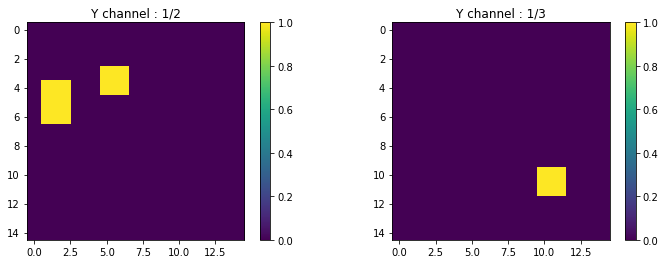

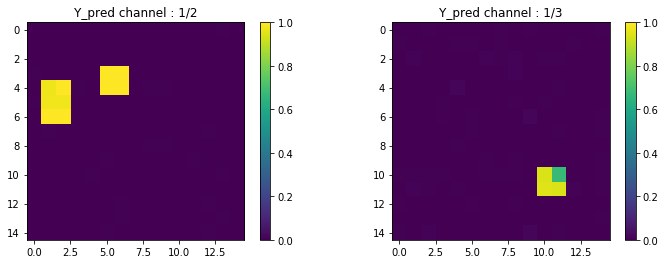

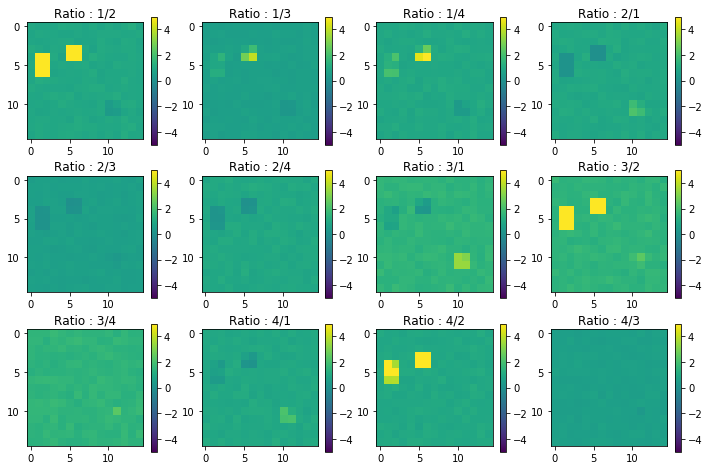

In [142]:
plt.figure(figsize=(12,4))
for i in range(y.shape[1]):
    plt.subplot(1,y.shape[1],i+1)
    plt.imshow(y[0,i,:,:], interpolation='none', clim=[0, 1])
    plt.colorbar()
    plt.title("Y channel : %s" % ratios[i])

plt.figure(figsize=(12,4))
for i in range(y_pred.shape[1]):
    plt.subplot(1,y_pred.shape[1],i+1)
    plt.imshow(y_pred[0,i,:,:], interpolation='none', clim=[0, 1])
    plt.colorbar()
    plt.title("Y_pred channel : %s" % ratios[i])
    
plt.figure(figsize=(12,8))
ratios = ["1/2", "1/3", "1/4", "2/1", "2/3", "2/4", "3/1", "3/2", "3/4", "4/1", "4/2", "4/3"]
for i in range(x.shape[1]):
    plt.subplot(3,4,i+1)
    plt.imshow(x[0,i,:,:], interpolation='none', clim=[-5, 5])
    plt.colorbar()
    plt.title("Ratio : %s" % ratios[i])


In [ ]:
# inputs = 

What is Convolution3D

In [16]:
from keras.layers import Convolution3D, Input, Reshape
from keras.optimizers import Adam

In [7]:
help(Convolution3D)

Help on class Convolution3D in module keras.layers.convolutional:

class Convolution3D(keras.engine.topology.Layer)
 |  Convolution operator for filtering windows of three-dimensional inputs.
 |  
 |  When using this layer as the first layer in a model,
 |  provide the keyword argument `input_shape`
 |  (tuple of integers, does not include the sample axis),
 |  e.g. `input_shape=(3, 10, 128, 128)` for 10 frames of 128x128 RGB pictures.
 |  
 |  # Arguments
 |      nb_filter: Number of convolution filters to use.
 |      kernel_dim1: Length of the first dimension in the convolution kernel.
 |      kernel_dim2: Length of the second dimension in the convolution kernel.
 |      kernel_dim3: Length of the third dimension in the convolution kernel.
 |      init: name of initialization function for the weights of the layer
 |          (see [initializations](../initializations.md)), or alternatively,
 |          Theano function to use for weights initialization.
 |          This parameter is o

In [48]:
n_filters_0 = 1
n_classes = 2
input_height = 10
input_width = 10
n_channels = 3
size=3

inputs = Input((1, n_channels, input_height, input_width))
x = inputs
x = Convolution3D(n_filters_0, size, size, size, init='one', activation='relu')(x)
outputs = x

model = Model(input=inputs, output=outputs)

In [49]:
X = np.ones((1, 1, n_channels, input_height, input_width))
for i in range(1,n_channels):
    X[0, 0, i, :, :] = i+1

In [50]:
model.compile(optimizer=Adam(lr=0.01), loss='binary_crossentropy', metrics=['recall', 'precision', 'accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
input_8 (InputLayer)             (None, 1, 3, 10, 10)  0                                            
____________________________________________________________________________________________________
convolution3d_8 (Convolution3D)  (None, 1, 1, 8, 8)    28          input_8[0][0]                    
Total params: 28
Trainable params: 28
Non-trainable params: 0
____________________________________________________________________________________________________


In [51]:
layer = model.get_layer(index=1)
print layer.W.eval(), layer.b.eval()

[[[[[ 1.  1.  1.]
    [ 1.  1.  1.]
    [ 1.  1.  1.]]

   [[ 1.  1.  1.]
    [ 1.  1.  1.]
    [ 1.  1.  1.]]

   [[ 1.  1.  1.]
    [ 1.  1.  1.]
    [ 1.  1.  1.]]]]] [ 0.]


In [52]:
Y_pred = model.predict(X)

In [53]:
X.shape, Y_pred.shape

((1, 1, 3, 10, 10), (1, 1, 1, 8, 8))

In [54]:
print X[0,0,:,0,0]
print Y_pred[0,0,0,:,:]

[ 1.  2.  3.]
[[ 54.  54.  54.  54.  54.  54.  54.  54.]
 [ 54.  54.  54.  54.  54.  54.  54.  54.]
 [ 54.  54.  54.  54.  54.  54.  54.  54.]
 [ 54.  54.  54.  54.  54.  54.  54.  54.]
 [ 54.  54.  54.  54.  54.  54.  54.  54.]
 [ 54.  54.  54.  54.  54.  54.  54.  54.]
 [ 54.  54.  54.  54.  54.  54.  54.  54.]
 [ 54.  54.  54.  54.  54.  54.  54.  54.]]


In [57]:
size**2 * (np.sum(X[0,0,:,0,0]))

54.0

In [1471]:
def generate_ratios(inputs):
    # Generate channels ratios:
    in_shape = inputs.shape
    out_shape = list(inputs.shape)
    out_shape[1] *= (out_shape[1] - 1)
    outputs = np.zeros(out_shape)
    for k in range(out_shape[0]):
        for i in range(in_shape[1]):
            vals = range(in_shape[1])
            vals.remove(i)
            for j, v in enumerate(vals):
                outputs[k,i*(in_shape[1]-1) + j,:,:] = inputs[k,i,:,:] / inputs[k,v,:,:]
    return outputs

In [1472]:
x=np.zeros((1,4,5,5))
x[0,0,:,:] = 1.0
x[0,1,:,:] = 2.0
x[0,2,:,:] = 3.0
x[0,3,:,:] = 4.0

In [1473]:
xx = generate_ratios(x)
xx.shape

(1, 12, 5, 5)

In [1480]:
xx[0,6,:,:]

array([[ 3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.],
       [ 3.,  3.,  3.,  3.,  3.]])

In [1415]:
import theano
from theano import tensor as T
from theano.

X = K.variable(x)
in_shape = K.shape(X)
in_shape.eval(), type(X), type(in_shape)

(array([1, 4, 5, 5]),
 theano.tensor.sharedvar.TensorSharedVariable,
 theano.tensor.var.TensorVariable)

In [1421]:
out_shape = T.set_subtensor(in_shape[1], in_shape[1]*(in_shape[1]-1))

In [1424]:
results,updates = theano.scan(
    lambda i,j : X[:,i,:,:] / X[:,j,:,:],
    sequences=[T.arange(X.shape[1]), T.arange(X.shape[1])+1],
    outputs_info=None
)

In [1425]:
mix_channels = theano.function(inputs=[X], outputs=results)

TypeError: Cannot use a shared variable (<TensorType(float32, 4D)>) as explicit input. Consider substituting a non-shared variable via the `givens` parameter

In [1420]:
np.asarray(0., dtype=theano.config.floatX)

array(0.0, dtype=float32)

In [1406]:
# out_shape = T.set_subtensor(in_shape[1], in_shape[1]*(in_shape[1]-1))
# out_shape.eval()
# XX = T.zeros(out_shape)

# X = T.matrix("X")
# results, updates = theano.scan(lambda i, j, t_f: T.cast(X[i, j] + t_f, floatX),
#                   sequences=[T.arange(X.shape[0]), T.arange(X.shape[1])],
#                   outputs_info=np.asarray(0., dtype=floatX))
# result = results[-1]
# compute_trace = theano.function(inputs=[X], outputs=result)

# # test value
# x = np.eye(5, dtype=theano.config.floatX)
# x[0] = np.arange(5, dtype=theano.config.floatX)
# print(compute_trace(x))


TypeError: TensorType does not support iteration. Maybe you are using builtin.sum instead of theano.tensor.sum? (Maybe .max?)

In [20]:
a = 2*K.ones((3, 5, 10,10))
b = 3*K.ones((3, 5, 10,10))

In [21]:
c = K.concatenate([a, b], axis=1)

In [22]:
K.shape(c).eval()

array([ 3, 10, 10, 10])

In [231]:
b = K.cast(K.greater(a, 0.5),'float32')

In [232]:
b.eval()

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
        1.,  1.,  1.,  1.,  1.,  1.,  1.], dtype=float32)

In [233]:
c = a * b

In [234]:
c.eval()

array([ 0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
        0.        ,  0.55000001,  0.60000002,  0.64999998,  0.69999999,
        0.75      ,  0.80000001,  0.85000002,  0.89999998,  0.94999999], dtype=float32)